<h1> Classify your reviews text using advanced natural langugage processing techniques and mathematical optimization algorithms

In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [150]:
raw_reviews_df = pd.read_json('/home/nikhil/Downloads/Electronics_Split/electronics_reviews_aa.json', lines=True)

In [151]:
raw_reviews_df.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0528881469,"[0, 0]",5,We got this GPS for my husband who is an (OTR)...,"06 2, 2013",AO94DHGC771SJ,amazdnu,Gotta have GPS!,1370131200
1,0528881469,"[12, 15]",1,"I'm a professional OTR truck driver, and I bou...","11 25, 2010",AMO214LNFCEI4,Amazon Customer,Very Disappointed,1290643200
2,0528881469,"[43, 45]",3,"Well, what can I say. I've had this unit in m...","09 9, 2010",A3N7T0DY83Y4IG,C. A. Freeman,1st impression,1283990400
3,0528881469,"[9, 10]",2,"Not going to write a long review, even thought...","11 24, 2010",A1H8PY3QHMQQA0,"Dave M. Shaw ""mack dave""","Great grafics, POOR GPS",1290556800
4,0528881469,"[0, 0]",1,I've had mine for a year and here's what we go...,"09 29, 2011",A24EV6RXELQZ63,Wayne Smith,"Major issues, only excuses for support",1317254400


In [152]:
raw_reviews_df.tail()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
123575,B0002ZW5W4,"[0, 0]",1,"These do have good noise blocking abilities, a...","03 20, 2011",A30VX6KH8RZS4R,gilbert,Terrible sound quality,1300579200
123576,B0002ZW5W4,"[0, 0]",5,Needed a pair of in ear headphones to use whil...,"10 8, 2006",AKJJOPDX9WMEQ,G. Lawrence,"So far, so good",1160265600
123577,B0002ZW5W4,"[0, 0]",5,Purchased the Etymotic ER6i Earphones about a ...,"09 20, 2009",A2WIC2PPTPTQ2M,G.Milliken,Works for me!,1253404800
123578,B0002ZW5W4,"[0, 8]",3,I used these 4 times and they have stopped wor...,"12 30, 2006",A1QCFT8LPDEZIY,"Graham S. Sherrington ""cyberphobia""",not very good,1167436800
123579,B0002ZW5W4,"[0, 0]",5,I have had the same pair for 3-4 years and use...,"01 10, 2009",A2L232VPEGQU95,Gregory A. Post,Always look forward to using my ER6i's,1231545600


In [153]:
raw_reviews_df.shape

(123580, 9)

In [154]:
raw_reviews_df.isnull().sum()

asin                0
helpful             0
overall             0
reviewText          0
reviewTime          0
reviewerID          0
reviewerName      447
summary             0
unixReviewTime      0
dtype: int64

In [155]:
print('No of words reviewText: {:,} words'.format(len(raw_reviews_df['reviewText'])))

No of words reviewText: 123,580 words


In [156]:
raw_reviews_df['reviewTime'] = pd.to_datetime(raw_reviews_df['reviewTime'])

In [157]:
raw_reviews_df.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0528881469,"[0, 0]",5,We got this GPS for my husband who is an (OTR)...,2013-06-02,AO94DHGC771SJ,amazdnu,Gotta have GPS!,1370131200
1,0528881469,"[12, 15]",1,"I'm a professional OTR truck driver, and I bou...",2010-11-25,AMO214LNFCEI4,Amazon Customer,Very Disappointed,1290643200
2,0528881469,"[43, 45]",3,"Well, what can I say. I've had this unit in m...",2010-09-09,A3N7T0DY83Y4IG,C. A. Freeman,1st impression,1283990400
3,0528881469,"[9, 10]",2,"Not going to write a long review, even thought...",2010-11-24,A1H8PY3QHMQQA0,"Dave M. Shaw ""mack dave""","Great grafics, POOR GPS",1290556800
4,0528881469,"[0, 0]",1,I've had mine for a year and here's what we go...,2011-09-29,A24EV6RXELQZ63,Wayne Smith,"Major issues, only excuses for support",1317254400


In [158]:
raw_reviews_df['asin'].value_counts()[:10]

B0002L5R78    2599
B00007E7JU    1279
B00004ZCJE    1258
B0001FTVEK     950
B00005T3G0     712
B00007M1TZ     677
B00017LSPI     629
B00009R6TA     611
B0000BZL1P     601
B00007EDZG     586
Name: asin, dtype: int64

In [159]:
len(raw_reviews_df['asin'].value_counts())

5078

In [160]:
raw_reviews_df['asin'].value_counts()[5068:5078]

B0001OH8PU    5
B00006JKWE    5
B00005UK9Y    5
B0002KR39O    5
B0000665P3    5
B00004X036    5
B000234UQA    5
B00008XOLT    5
B0000CA2GY    5
B00009V4G7    5
Name: asin, dtype: int64

In [161]:
import nltk
from nltk.corpus import stopwords
import wordcloud as wcloud
from nltk.tokenize import wordpunct_tokenize
stop = stopwords.words('english')

In [162]:
raw_reviews_df['processedReviewText'] = raw_reviews_df['reviewText'].apply(lambda x: x.lower())

In [163]:
import string
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

def remove_digits(text):
    for digits in string.digits:
        text = text.replace(digits, '')
    return text

In [164]:
raw_reviews_df['processedReviewText'] = raw_reviews_df['processedReviewText'].apply(remove_digits)

In [165]:
raw_reviews_df['processedReviewText'] = raw_reviews_df['processedReviewText'].apply(remove_punctuations)

In [166]:
raw_reviews_df['processedReviewText'] = raw_reviews_df['processedReviewText'].apply(nltk.word_tokenize)

In [167]:
raw_reviews_df['processedReviewText'] = raw_reviews_df['processedReviewText'].apply(lambda x: [item for item in x if item not in stop])

In [168]:
raw_reviews_df['processedReviewText'].head()

0    [got, gps, husband, otr, road, trucker, impres...
1    [im, professional, otr, truck, driver, bought,...
2    [well, say, ive, unit, truck, four, days, prio...
3    [going, write, long, review, even, thought, un...
4    [ive, mine, year, heres, got, tries, route, no...
Name: processedReviewText, dtype: object

In [169]:
words = raw_reviews_df['reviewText']
words_str = words.str.cat(sep = ' ')
list_of_words = [i.lower() for i in wordpunct_tokenize(words_str) if i.lower() not in stop and i.isalpha()]
wordfreqdist = nltk.FreqDist(list_of_words)
mostcommon = wordfreqdist.most_common(25)
most_common_df = pd.DataFrame(mostcommon, columns=['word', 'count'])

In [170]:
most_common_df

,word,count
0,one,57102
1,use,50587
2,good,46762
3,great,46141
4,lens,43887
5,like,37875
6,get,37303
7,would,35805
8,camera,35465
9,well,34496


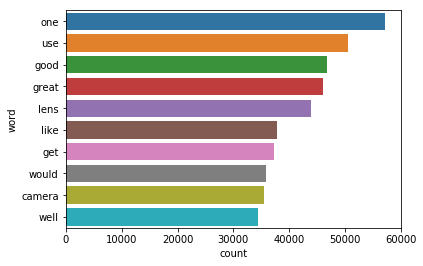

In [171]:
sns.barplot(x = 'count', y = 'word', data = most_common_df[:10])
plt.show()

In [172]:
cloud = wcloud.WordCloud(background_color='gray', max_font_size=45, 
                                relative_scaling=1).generate(' '.join(raw_reviews_df['reviewText']))

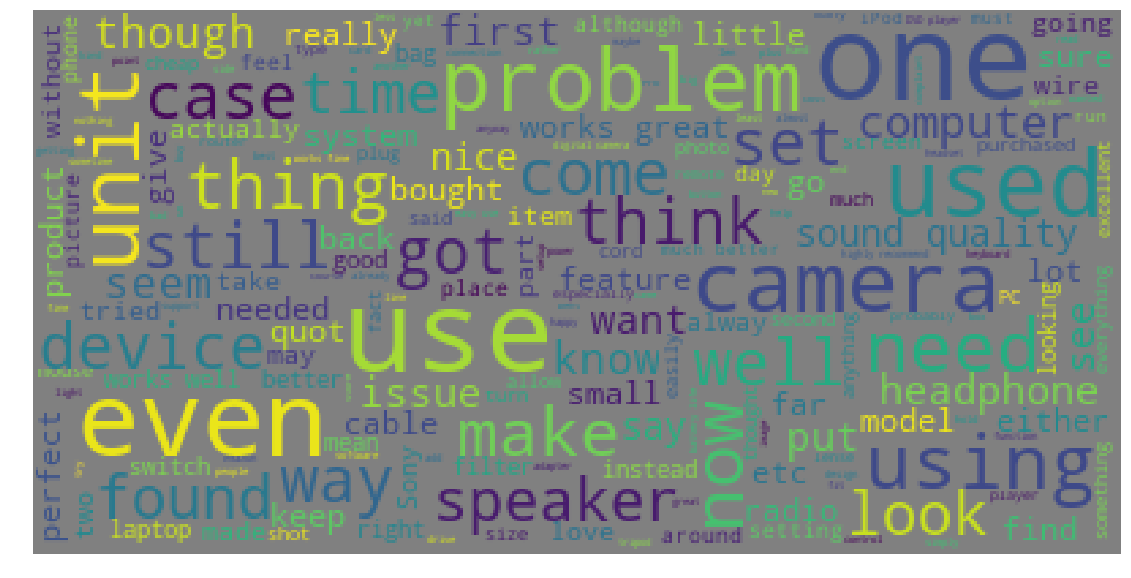

In [173]:
fig = plt.figure(figsize=(20, 10))
plt.axis('off')
plt.imshow(cloud)

# Clustering - Topic Modelling

In [174]:
transformed_reviews_df = raw_reviews_df

In [175]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# tf-idf
tf_idf_vect = TfidfVectorizer(stop_words=stop)
tf_idf = tf_idf_vect.fit_transform(transformed_reviews_df['reviewText'])

# tf
tf_vect = CountVectorizer(stop_words=stop)
tf = tf_vect.fit_transform(transformed_reviews_df['reviewText'])

In [176]:
print("Total # of features: {}".format(len(tf_idf_vect.get_feature_names())))

Total # of features: 97164


In [177]:
from sklearn.decomposition import NMF, LatentDirichletAllocation

nmf = NMF(n_components=10, random_state=1,
          alpha=.1, l1_ratio=.5)

lda = LatentDirichletAllocation(n_components=10, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)

In [178]:
num_top_words = 15

def getTopics(model, feature_names, num_top_words):
    for idx, topic in enumerate(model.components_):
        print("Topic #{}:".format(idx), end='\n')
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-num_top_words - 1:-1]]), end='\n\n')
    print()

In [179]:
nmf_tf = nmf.fit(tf)
nmf_1 = nmf_tf.transform(tf)

In [180]:
getTopics(nmf_tf, tf_idf_vect.get_feature_names(), num_top_words)

Topic #0:
use player unit like get also dvd time battery cd would screen ipod even want

Topic #1:
lens canon lenses focus zoom sharp light get wide 70 use filter much 50mm ef

Topic #2:
camera pictures digital use flash cameras canon card take battery zoom picture also like batteries

Topic #3:
speakers sound system speaker bass sub set subwoofer music volume audio bose room better computer

Topic #4:
cable cables tv quality works video hdmi usb audio signal digital need box power picture

Topic #5:
router wireless card linksys network work get computer connection support laptop setup internet set windows

Topic #6:
one two would like bag bought another get new well back buy case years first

Topic #7:
headphones sound ear bass like music quality noise pair ears better use much headphone comfortable

Topic #8:
mouse use keyboard usb buttons button logitech work used using wheel like scroll optical trackball

Topic #9:
good great price quality well get really radio works better would p

In [181]:
nmf_tf_idf = nmf.fit(tf_idf)
nmf_2 = nmf_tf.transform(tf_idf)

In [182]:
getTopics(nmf_tf, tf_idf_vect.get_feature_names(), num_top_words)

Topic #0:
one use work get would unit time like router bought power dvd computer two player

Topic #1:
lens filter canon lenses focus sharp light hood 50mm nikon zoom wide shots get cap

Topic #2:
cable cables hdmi tv connect quality needed monster audio video signal length monitor works need

Topic #3:
headphones sound ear comfortable pair bass ears music head noise cord headphone hear volume quality

Topic #4:
camera pictures digital battery flash cameras batteries canon card take use photos picture zoom shots

Topic #5:
great works product well price fine say recommend easy advertised needed perfectly item use exactly

Topic #6:
speakers sound speaker system bass sub subwoofer wire surround set volume audio music bose room

Topic #7:
mouse keyboard logitech usb buttons mice wheel trackball optical microsoft scroll use wireless button laptop

Topic #8:
good price quality product buy recommend filter would job well excellent value sound nice cheap

Topic #9:
bag case fit carry well st

In [183]:
import time
start_time = time.time()
lda_tf = lda.fit(tf)
lda_1 = lda_tf.transform(tf)
print("--- %s seconds ---" % (time.time() - start_time))

--- 1028.429360628128 seconds ---


In [184]:
getTopics(lda_tf, tf_idf_vect.get_feature_names(), num_top_words)

Topic #0:
battery ipod software screen batteries unit use drive button keyboard also memory buttons device life

Topic #1:
cable tv cables remote hdmi video wire 34 kit digital works picture audio wall receiver

Topic #2:
sound speakers headphones bass music volume speaker system good quality ear noise audio sub set

Topic #3:
camera pictures canon flash digital cameras nikon photos shots zoom light use take battery picture

Topic #4:
one good like great would get use well price quality much really bought buy time

Topic #5:
radio antenna car fm reception signal unit stations static transmitter station channels stereo batteries radios

Topic #6:
quot oem express de pointed dc la bodies un el es pny assembly din juice

Topic #7:
lens bag lenses filter canon tripod wide strap focus light sharp carry body 70 quality

Topic #8:
player dvd cd mp3 play music shot songs players sony discs disc cds media polk

Topic #9:
mouse works computer wireless one work cable power usb router laptop use p

In [185]:
start_time = time.time()
lda_tf_idf = lda.fit(tf_idf)
lda_2 = lda_tf.transform(tf_idf)
print("--- %s seconds ---" % (time.time() - start_time))

--- 773.9151151180267 seconds ---


In [186]:
getTopics(lda_tf_idf, tf_idf_vect.get_feature_names(), num_top_words)

Topic #0:
pedal er6i 07 pedals vid ch cerwin roland dunlop vega digitech benq intercom chipped wusb54gs

Topic #1:
wally readynas hu roxio 5g nv absolutly definitions valentine df 6g replacment dyi notmad pfsense

Topic #2:
vizio steering dayton 500mm len stiffness hears perpendicular switchbox qulity equipement drone thunderbolt suprise everthing

Topic #3:
expander expodisc wre54g avh ilford shotgun d800 interview condenser dave clicker dvdr mattered convinient stripes

Topic #4:
5500 bmw singapore ddr yay trucks ga 92 rotated hawaii exhaust crimpers iraq wa overheated

Topic #5:
great good one cable works use lens price well quality sound would like camera get

Topic #6:
pelican celestron d200 sunpak barlow cherry giottos reflector marine clone nozzle umbrellas a75 hardest junky

Topic #7:
de la en es el que guage muy para ver lo flatscreen oacute drywall un

Topic #8:
recomended costa rica bearings hex beer bw m40fs lr bla modulators pignose bubbles delightful ctg

Topic #9:
www ht

# Classification

In [187]:
classified_reviews_df = raw_reviews_df

In [188]:
classified_reviews_df.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,processedReviewText
0,0528881469,"[0, 0]",5,We got this GPS for my husband who is an (OTR)...,2013-06-02,AO94DHGC771SJ,amazdnu,Gotta have GPS!,1370131200,"[got, gps, husband, otr, road, trucker, impres..."
1,0528881469,"[12, 15]",1,"I'm a professional OTR truck driver, and I bou...",2010-11-25,AMO214LNFCEI4,Amazon Customer,Very Disappointed,1290643200,"[im, professional, otr, truck, driver, bought,..."
2,0528881469,"[43, 45]",3,"Well, what can I say. I've had this unit in m...",2010-09-09,A3N7T0DY83Y4IG,C. A. Freeman,1st impression,1283990400,"[well, say, ive, unit, truck, four, days, prio..."
3,0528881469,"[9, 10]",2,"Not going to write a long review, even thought...",2010-11-24,A1H8PY3QHMQQA0,"Dave M. Shaw ""mack dave""","Great grafics, POOR GPS",1290556800,"[going, write, long, review, even, thought, un..."
4,0528881469,"[0, 0]",1,I've had mine for a year and here's what we go...,2011-09-29,A24EV6RXELQZ63,Wayne Smith,"Major issues, only excuses for support",1317254400,"[ive, mine, year, heres, got, tries, route, no..."


In [189]:
classified_reviews_df['ratings_labeled'] = [1 if ratings >= 3 else 0 for ratings in classified_reviews_df['overall']]

In [190]:
classified_reviews_df.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,processedReviewText,ratings_labeled
0,0528881469,"[0, 0]",5,We got this GPS for my husband who is an (OTR)...,2013-06-02,AO94DHGC771SJ,amazdnu,Gotta have GPS!,1370131200,"[got, gps, husband, otr, road, trucker, impres...",1
1,0528881469,"[12, 15]",1,"I'm a professional OTR truck driver, and I bou...",2010-11-25,AMO214LNFCEI4,Amazon Customer,Very Disappointed,1290643200,"[im, professional, otr, truck, driver, bought,...",0
2,0528881469,"[43, 45]",3,"Well, what can I say. I've had this unit in m...",2010-09-09,A3N7T0DY83Y4IG,C. A. Freeman,1st impression,1283990400,"[well, say, ive, unit, truck, four, days, prio...",1
3,0528881469,"[9, 10]",2,"Not going to write a long review, even thought...",2010-11-24,A1H8PY3QHMQQA0,"Dave M. Shaw ""mack dave""","Great grafics, POOR GPS",1290556800,"[going, write, long, review, even, thought, un...",0
4,0528881469,"[0, 0]",1,I've had mine for a year and here's what we go...,2011-09-29,A24EV6RXELQZ63,Wayne Smith,"Major issues, only excuses for support",1317254400,"[ive, mine, year, heres, got, tries, route, no...",0


In [191]:
classified_reviews_df['ratings_labeled'].value_counts()

1    109889
0     13691
Name: ratings_labeled, dtype: int64

In [192]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(classified_reviews_df['reviewText'], 
                                                    classified_reviews_df['ratings_labeled'], 
                                                    random_state=0)

In [193]:
c_vect = CountVectorizer(min_df=5).fit(X_train)
X_train = c_vect.transform(X_train)

In [194]:
from sklearn.linear_model import LogisticRegression

logistic_l1 = LogisticRegression(penalty='l1').fit(X_train, y_train)

X_test = c_vect.transform(X_test)

log_y_pred = logistic_l1.predict(X_test)

In [195]:
print('Accuracy of Logistic with Lasso on test set: {:.2f}'.format(logistic_l1.score(X_test, y_test)))

Accuracy of Logistic with Lasso on test set: 0.92


[Text(0,0.5,'Negative'), Text(0,1.5,'Positive')]

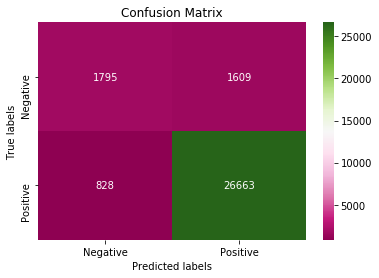

In [196]:
from sklearn.metrics import confusion_matrix

cfm = confusion_matrix(y_test, log_y_pred, labels=[0, 1])

ax= plt.subplot()
sns.heatmap(cfm, annot=cfm, ax = ax, cmap = 'PiYG', fmt='g')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Negative', 'Positive']); ax.yaxis.set_ticklabels(['Negative', 'Positive'])

In [197]:
from sklearn.metrics import classification_report
print(classification_report(y_test, log_y_pred))

             precision    recall  f1-score   support

          0       0.68      0.53      0.60      3404
          1       0.94      0.97      0.96     27491

avg / total       0.91      0.92      0.92     30895



In [198]:
from sklearn.linear_model import SGDClassifier

sgd_l2 = SGDClassifier(penalty='l2', loss = 'hinge').fit(X_train, y_train)

sgd_y_pred = sgd_l2.predict(X_test)

In [199]:
print('Accuracy of Stocastic Gradient Descent with Ridge on test set: {:.2f}'.format(sgd_l2.score(X_test, y_test)))

Accuracy of Stocastic Gradient Descent with Ridge on test set: 0.92


In [200]:
from sklearn.naive_bayes import MultinomialNB

multi_nb = MultinomialNB(alpha=.01).fit(X_train, y_train)

mnb_y_pred = multi_nb.predict(X_test)

In [201]:
print('Accuracy of Multinomial NB on test set: {:.2f}'.format(multi_nb.score(X_test, y_test)))

Accuracy of Multinomial NB on test set: 0.87


In [202]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion = 'entropy').fit(X_train, y_train)

rf_y_pred = rf.predict(X_test)

In [203]:
print('Accuracy of Random Forests on test set: {:.2f}'.format(rf.score(X_test, y_test)))

Accuracy of Random Forests on test set: 0.90


In [204]:
print(sgd_l2.predict(c_vect.transform(["Bad Camera don't buy this"])))

[1]


In [205]:
import imblearn 
from imblearn.over_sampling import SMOTE

In [206]:
sm = SMOTE(random_state=12, ratio = 'minority')
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [207]:
sgd_l2_2 = SGDClassifier(penalty='l2', loss = 'hinge').fit(X_train_res, y_train_res)

sgd_2_y_pred = sgd_l2_2.predict(X_test)

In [208]:
print('Accuracy of Stocastic Gradient Descent with Ridge on test set: {:.2f}'.format(sgd_l2_2.score(X_test, y_test)))

Accuracy of Stocastic Gradient Descent with Ridge on test set: 0.88


In [209]:
print(sgd_l2_2.predict(c_vect.transform(["Bad Camera don't buy this"])))

[0]


In [210]:
print(sgd_l2_2.predict(c_vect.transform(["Very Good Cable please buy it"])))

[0]


[Text(0,0.5,'Negative'), Text(0,1.5,'Positive')]

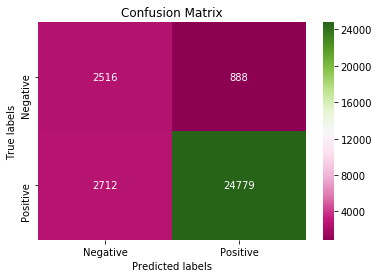

In [211]:
cfm = confusion_matrix(y_test, sgd_2_y_pred, labels=[0, 1])

ax= plt.subplot()
sns.heatmap(cfm, annot=cfm, ax = ax, cmap = 'PiYG', fmt='g')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Negative', 'Positive']); ax.yaxis.set_ticklabels(['Negative', 'Positive'])

In [212]:
print(classification_report(y_test, sgd_2_y_pred))

             precision    recall  f1-score   support

          0       0.48      0.74      0.58      3404
          1       0.97      0.90      0.93     27491

avg / total       0.91      0.88      0.89     30895



In [213]:
from sklearn.model_selection import GridSearchCV

parameters={'penalty' : ['l1', 'l2'], 'C' : [0.001, 0.01, 0.1, 1, 10]} 
clf_log=LogisticRegression() 
clf=GridSearchCV(clf_log,parameters) 
clf.fit(X_train,y_train)
clf.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [214]:
logistic_l2 = LogisticRegression(penalty='l2', C=0.1).fit(X_train, y_train)

log_y_pred = logistic_l2.predict(X_test)

print('Accuracy of Logistic with l2 penalty on test set: {:.2f}'.format(logistic_l2.score(X_test, y_test)))

Accuracy of Logistic with l2 penalty on test set: 0.92


In [215]:
parameters={'penalty' : ['l1', 'l2'], 'alpha' : [0.001, 0.01, 0.1, 1, 10], 'loss' : ['hinge', 'log', 'perceptron']} 
clf_sgd=SGDClassifier() 
clf=GridSearchCV(clf_sgd,parameters) 
clf.fit(X_train,y_train)
clf.best_params_

{'alpha': 0.001, 'loss': 'log', 'penalty': 'l2'}

In [216]:
sgd_l2 = SGDClassifier(penalty='l2', alpha=0.01, loss= 'hinge').fit(X_train, y_train)

sgd_y_pred = sgd_l2.predict(X_test)

print('Accuracy of Stocastic Gradient Descent Classifier with l2 penalty on test set: {:.2f}'.format(sgd_l2.score(X_test, y_test)))

Accuracy of Stocastic Gradient Descent Classifier with l2 penalty on test set: 0.91


In [217]:
print(classification_report(y_test, sgd_y_pred))

             precision    recall  f1-score   support

          0       0.84      0.20      0.33      3404
          1       0.91      1.00      0.95     27491

avg / total       0.90      0.91      0.88     30895



In [218]:
print(classification_report(y_test, log_y_pred))

             precision    recall  f1-score   support

          0       0.73      0.48      0.58      3404
          1       0.94      0.98      0.96     27491

avg / total       0.92      0.92      0.92     30895



In [219]:
print(classification_report(y_test, sgd_2_y_pred))

             precision    recall  f1-score   support

          0       0.48      0.74      0.58      3404
          1       0.97      0.90      0.93     27491

avg / total       0.91      0.88      0.89     30895



In [220]:
names = ['Logistic', 'MNB', 'RF', 'SGD_2', 'Logistic_CV', 'SGD_CV']
results = [logistic_l1.score(X_test, y_test),
           multi_nb.score(X_test, y_test),
           rf.score(X_test, y_test),
           sgd_l2_2.score(X_test, y_test),
           logistic_l2.score(X_test, y_test),
           sgd_l2.score(X_test, y_test)]

d = {'Model': names, 'Accuracy': results}
df = pd.DataFrame(data=d)
df

,Accuracy,Model
0,0.921120,Logistic
1,0.873442,MNB
2,0.897621,RF
3,0.883476,SGD_2
4,0.923450,Logistic_CV
5,0.907914,SGD_CV


In [221]:
print(logistic_l2.predict(c_vect.transform(["Bad Camera don't buy this"])))

[1]


In [222]:
print(sgd_l2_2.predict(c_vect.transform(["I think this is a very good product do not buy it"])))

[0]


In [223]:
X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(classified_reviews_df['reviewText'], 
                                                    classified_reviews_df['ratings_labeled'], 
                                                    random_state=0)

tf_idf_vect = TfidfVectorizer(min_df=5).fit(X_train_tf)
X_train_tf = tf_idf_vect.transform(X_train_tf)

In [224]:
sm = SMOTE(random_state=12, ratio = 'minority')
X_train_res_tf, y_train_res_tf = sm.fit_sample(X_train_tf, y_train_tf)

In [225]:
sgd_tf = SGDClassifier(penalty='l2', loss = 'hinge').fit(X_train_res_tf, y_train_res_tf)

X_test_tf = tf_idf_vect.transform(X_test_tf)

sgd_tf_y_pred = sgd_tf.predict(X_test_tf)

In [227]:
print('Accuracy of Stocastic Gradient Descent Classifier tf-idf with l2 penalty on test set: {:.2f}'.format(sgd_tf.score(X_test_tf, y_test_tf)))

Accuracy of Stocastic Gradient Descent Classifier tf-idf with l2 penalty on test set: 0.85
